In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset containing the labels
dataset = pd.read_csv('/Users/chizzycasa/Downloads/archive (1)/pokemon.csv')

# Path to the folder containing the images
image_folder_path = '/Users/chizzycasa/Downloads/archive (1)/images'

# Initialize empty lists for storing image data and labels
images = []
labels = []

# Initialize a LabelEncoder to encode categorical labels into numeric values
label_encoder = LabelEncoder()

# Fit the label encoder on the 'Type1' column (assuming 'Type1' is the column containing the Pokémon types)
labels_encoded = label_encoder.fit_transform(dataset['Type1'])

# Iterate through the dataset to load images and labels
for idx, row in dataset.iterrows():
    # Assuming each image file name is like 'Bulbasaur.png', 'Charmander.png', etc.
    image_filename = f"{row['Name']}.png"  # Assuming 'Name' contains the Pokémon names
    
    # Construct the full path to the image file
    image_path = os.path.join(image_folder_path, image_filename)
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img_array = image.img_to_array(img)  # Convert image to array
    images.append(img_array)
    
    # Append the corresponding encoded label
    labels.append(labels_encoded[idx])

# Convert images to numpy array and normalize pixel values
images = np.array(images) / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(label_encoder.classes_))  # Number of classes based on label encoding

In [2]:
# Check the number of unique labels
print("Unique labels:", label_encoder.classes_)
print("Number of unique labels:", len(label_encoder.classes_))

Unique labels: ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
Number of unique labels: 18


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

# Initialize the CNN model
model = Sequential()

# Add the input layer
model.add(Input(shape=(32, 32, 3)))  # Define the input shape here

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D arrays to 1D
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(18, activation='softmax'))  # 5 classes for classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Split dataset into training and testing (assuming you have a test set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(x_train, y_train, epochs=85, validation_data=(x_test, y_test))

Epoch 1/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0971 - loss: 2.8257 - val_accuracy: 0.1296 - val_loss: 2.7949
Epoch 2/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1594 - loss: 2.7037 - val_accuracy: 0.1481 - val_loss: 2.7797
Epoch 3/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1751 - loss: 2.6674 - val_accuracy: 0.1358 - val_loss: 2.8262
Epoch 4/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1750 - loss: 2.5829 - val_accuracy: 0.1728 - val_loss: 2.7652
Epoch 5/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2399 - loss: 2.4778 - val_accuracy: 0.1667 - val_loss: 2.7470
Epoch 6/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2546 - loss: 2.4524 - val_accuracy: 0.1975 - val_loss: 2.7346
Epoch 7/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2783 - loss: 2.3711 - val_accuracy: 0.1790 - val_loss: 2.6944
Epoch 8/85
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2810 - loss: 2.3497 - val_accuracy: 0.2160 - v

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1670 - loss: 9.0817  
Test Accuracy: 0.17283950746059418
Test Loss: 8.837108612060547


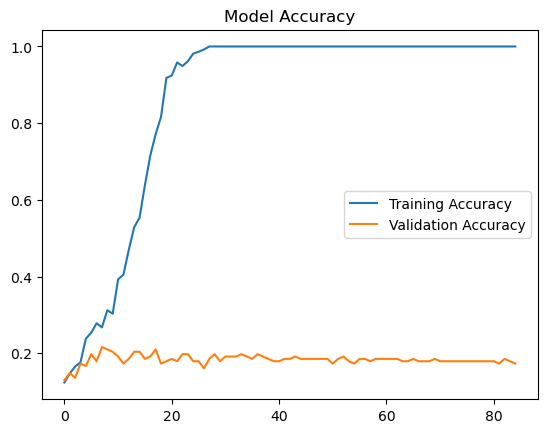

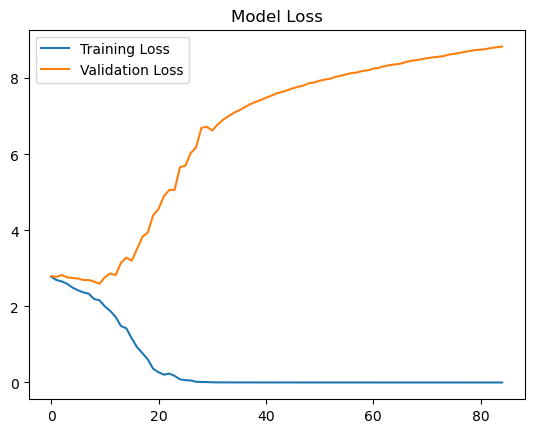

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()